In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan_data.csv')
data.head()

,age,income,assets,credit_score,debt_to_income_ratio,existing_loan,criminal_record,loan_approved
0,56.0,53779.0,771450.000000,700.0,0.45,1,0,0
1,65.0,141745.0,525485.720059,889.0,0.34,1,1,0
2,60.0,37340.0,459420.000000,788.0,0.35,0,1,0
3,61.0,101388.0,168102.000000,831.0,0.32,1,1,0
4,27.0,83269.0,187546.000000,691.0,0.21,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12367 entries, 0 to 12366
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   12367 non-null  float64
 1   income                12367 non-null  float64
 2   assets                12367 non-null  float64
 3   credit_score          12367 non-null  float64
 4   debt_to_income_ratio  12367 non-null  float64
 5   existing_loan         12367 non-null  int64  
 6   criminal_record       12367 non-null  int64  
 7   loan_approved         12367 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 773.1 KB


In [4]:
#convert float columns to integer
float_cols = data.select_dtypes(include=['float']).columns
data[float_cols] = data[float_cols].astype('int64')


<function matplotlib.pyplot.show(close=None, block=None)>

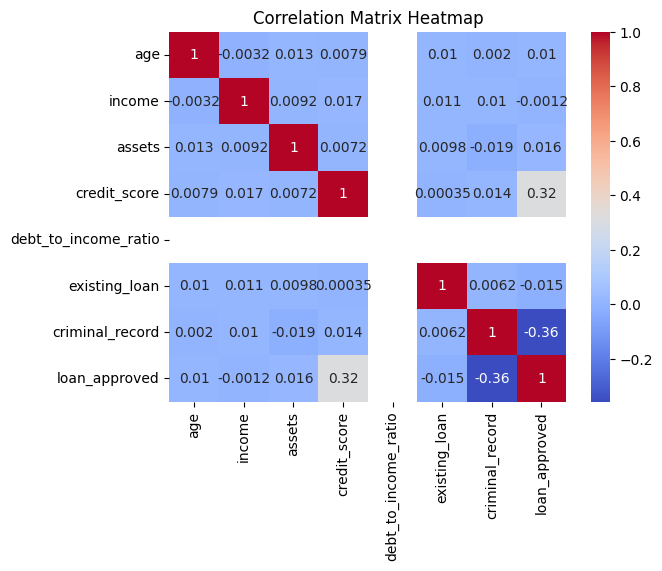

In [5]:
#corelation matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show


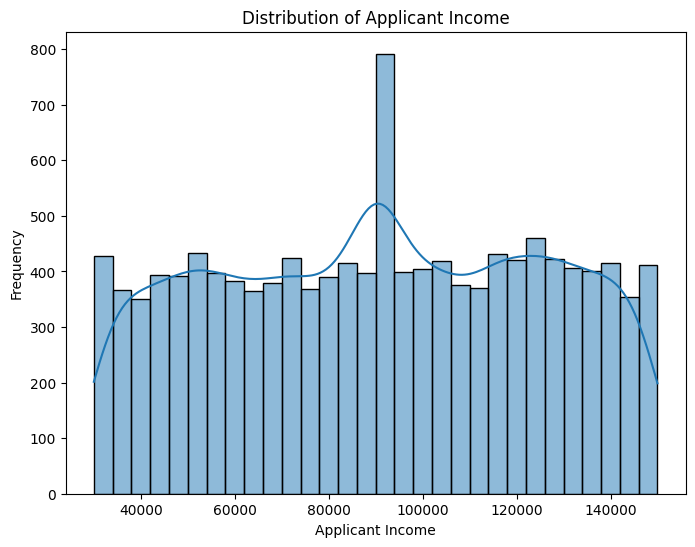

In [6]:
#distribution of income
plt.figure(figsize=(8,6))
sns.histplot(data['income'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

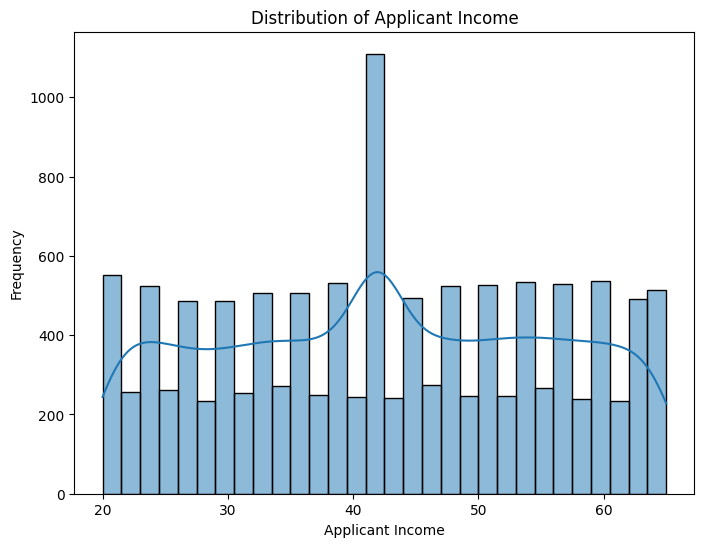

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

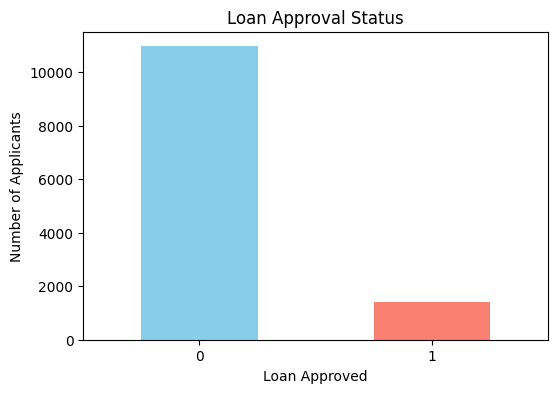

In [8]:
#matplotlib bar chart for loan approval status
approval_counts = data['loan_approved'].value_counts()
plt.figure(figsize=(6,4))
approval_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Approval Status')
plt.xlabel('Loan Approved')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)


In [9]:
approval_counts

loan_approved
0    10960
1     1407
Name: count, dtype: int64

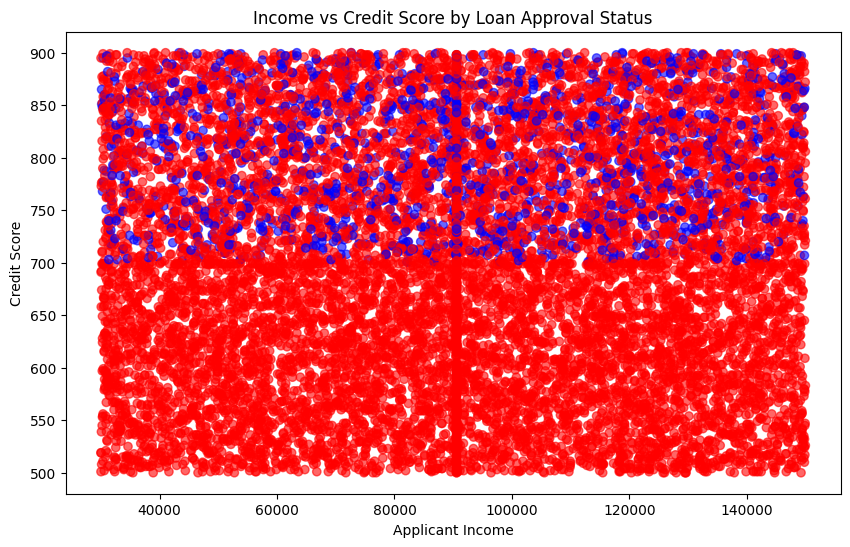

In [10]:
#relate loan approved with income and credit score using matplotlib
plt.figure(figsize=(10,6))
plt.scatter(data['income'], data['credit_score'], c=data['loan_approved'].map({1: 'blue', 0: 'red'}), alpha=0.6)
plt.title('Income vs Credit Score by Loan Approval Status')
plt.xlabel('Applicant Income')
plt.ylabel('Credit Score')
plt.show()

In [11]:
df = data.copy()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [13]:
X = df.drop('loan_approved', axis=1)
y = df['loan_approved']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
feature_names = X.columns  
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value (most influential first)
feature_importance['AbsCoef'] = feature_importance['Coefficient'].abs()
print(feature_importance.sort_values(by='AbsCoef', ascending=False))

                Feature   Coefficient       AbsCoef
6       criminal_record -5.831974e+00  5.831974e+00
5         existing_loan -3.465644e-02  3.465644e-02
3          credit_score  1.330496e-02  1.330496e-02
0                   age  2.478504e-04  2.478504e-04
2                assets  1.256908e-07  1.256908e-07
1                income  8.779726e-08  8.779726e-08
4  debt_to_income_ratio  0.000000e+00  0.000000e+00


In [15]:
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      3294
           1       0.47      0.35      0.40       417

    accuracy                           0.88      3711
   macro avg       0.69      0.65      0.67      3711
weighted avg       0.87      0.88      0.87      3711

Confusion Matrix:
 [[3127  167]
 [ 270  147]]
ROC AUC score: 0.9269684434601682


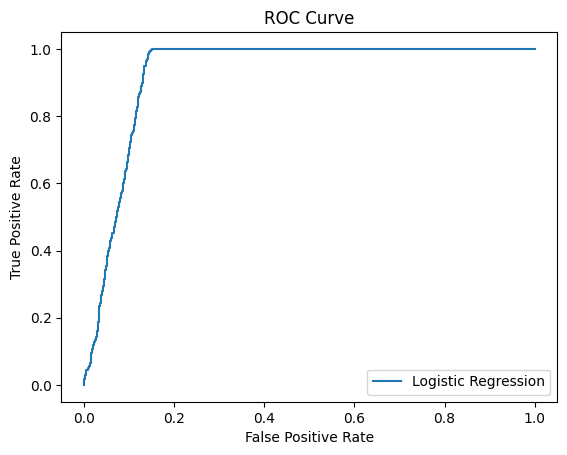

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [18]:
import pandas as pd

new_data = pd.DataFrame([
    # Highly likely to be approved (good score, low debt, no criminal record)
    {
        'age': 28, 'income': 60000, 'assets': 175000, 'credit_score': 800, 'debt_to_income_ratio': 18, 
        'existing_loan': 0, 'criminal_record': 0
    },
    # Unlikely to be approved (bad score, high debt, criminal record)
    {
        'age': 54, 'income': 32000, 'assets': 50000, 'credit_score': 600, 'debt_to_income_ratio': 45,
        'existing_loan': 1, 'criminal_record': 1
    },
    # Marginal case
    {
        'age': 40, 'income': 39000, 'assets': 90000, 'credit_score': 680, 'debt_to_income_ratio': 32,
        'existing_loan': 0, 'criminal_record': 0
    },
    # Another likely approval
    {
        'age': 30, 'income': 75000, 'assets': 200000, 'credit_score': 780, 'debt_to_income_ratio': 16,
        'existing_loan': 0, 'criminal_record': 0
    }
])

# Make predictions
pred_result = lr.predict(new_data)
print(pred_result) 


[0 0 0 0]


In [19]:
import pandas as pd

# Sample test data
test_data = pd.DataFrame([
    {'age': 45, 'income': 67000, 'assets': 350000, 'credit_score': 750, 'debt_to_income_ratio': 0.32, 'existing_loan': 0, 'criminal_record': 0},
    {'age': 62, 'income': 84000, 'assets': 600000, 'credit_score': 810, 'debt_to_income_ratio': 0.29, 'existing_loan': 1, 'criminal_record': 0},
    {'age': 53, 'income': 39700, 'assets': 420000, 'credit_score': 665, 'debt_to_income_ratio': 0.41, 'existing_loan': 0, 'criminal_record': 1},
    {'age': 38, 'income': 54000, 'assets': 500000, 'credit_score': 480, 'debt_to_income_ratio': 0.76, 'existing_loan': 1, 'criminal_record': 0},
    {'age': 60, 'income': 135000, 'assets': 850000, 'credit_score': 860, 'debt_to_income_ratio': 0.22, 'existing_loan': 0, 'criminal_record': 0}
])
  
# Predict using trained model
preds = lr.predict(test_data)
print(preds)  # Output: array of 0 (not approved) or 1 (approved)


[0 0 0 0 1]


Decision Tree Classifier Model

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      3294
           1       0.49      0.49      0.49       417

    accuracy                           0.88      3711
   macro avg       0.71      0.71      0.71      3711
weighted avg       0.88      0.88      0.88      3711

Confusion Matrix:
 [[3078  216]
 [ 213  204]]
ROC AUC Score: 0.711817431300861


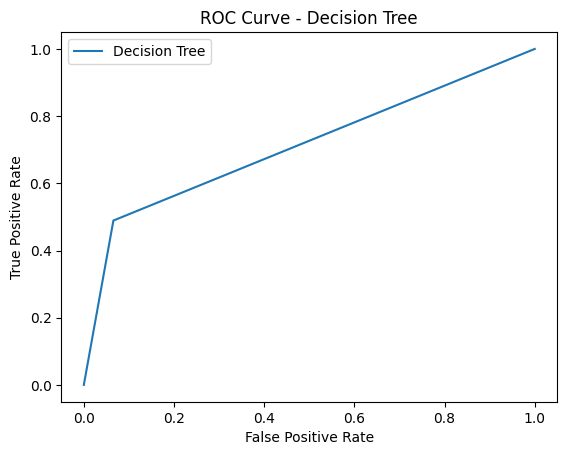

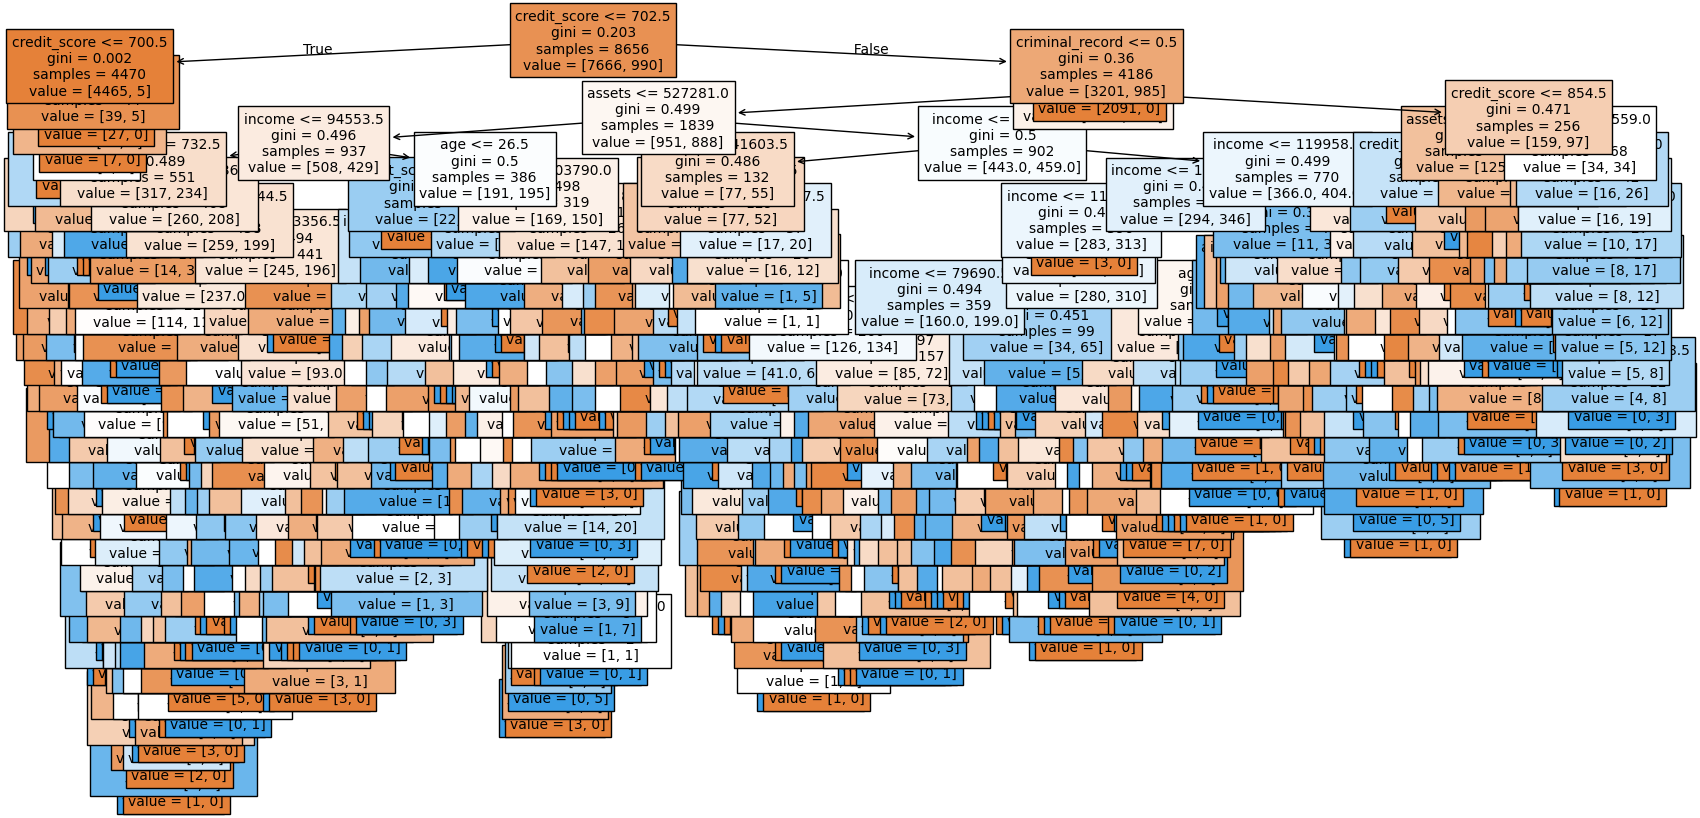

                Feature  Importance
3          credit_score    0.283237
6       criminal_record    0.264879
2                assets    0.167242
1                income    0.162485
0                   age    0.106325
5         existing_loan    0.015833
4  debt_to_income_ratio    0.000000


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prepare features and target (assumes columns are renamed as in previous step)
features_dt = df.drop('loan_approved', axis=1)
target_dt = df['loan_approved']

# Train/Test split
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(
    features_dt, target_dt, test_size=0.3, random_state=42
)

# Build and fit Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_dt_train, y_dt_train)

# Predict and probabilities
dt_pred = dt_classifier.predict(X_dt_test)
dt_pred_prob = dt_classifier.predict_proba(X_dt_test)[:, 1]

# Evaluation outputs
print("Classification Report:\n", classification_report(y_dt_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_dt_test, dt_pred))
print("ROC AUC Score:", roc_auc_score(y_dt_test, dt_pred_prob))

# Plot ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_dt_test, dt_pred_prob)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

# Plot tree structure (for small trees)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=features_dt.columns, filled=True, fontsize=10)
plt.show()

# Feature importances
importances_dt = dt_classifier.feature_importances_
importance_df_dt = pd.DataFrame({
    'Feature': features_dt.columns,
    'Importance': importances_dt
}).sort_values('Importance', ascending=False)
print(importance_df_dt)


In [21]:
import pandas as pd

# Sample test data (keep original column names, no target)
test_data_dt = pd.DataFrame([
    {'age': 45, 'income': 67000, 'assets': 350000, 'credit_score': 750, 'debt_to_income_ratio': 0.32, 'existing_loan': 0, 'criminal_record': 0},
    {'age': 62, 'income': 84000, 'assets': 600000, 'credit_score': 810, 'debt_to_income_ratio': 0.29, 'existing_loan': 1, 'criminal_record': 0},
    {'age': 53, 'income': 39700, 'assets': 420000, 'credit_score': 665, 'debt_to_income_ratio': 0.41, 'existing_loan': 0, 'criminal_record': 1},
    {'age': 38, 'income': 54000, 'assets': 500000, 'credit_score': 480, 'debt_to_income_ratio': 0.76, 'existing_loan': 1, 'criminal_record': 0},
    {'age': 60, 'income': 135000, 'assets': 850000, 'credit_score': 760, 'debt_to_income_ratio': 0.22, 'existing_loan': 0, 'criminal_record': 0}
])

# Predict
preds = dt_classifier.predict(test_data_dt)
print(preds)  # Output: array of 0 (not approved) or 1 (approved)


[0 1 0 0 0]


Random Forest Classification Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [23]:
X_rf = df.drop('loan_approved', axis=1)
y_rf = df['loan_approved']

# Train/Test split
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)


In [24]:
# Build and fit Random Forest model
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_rf_train, y_rf_train)

# Predict and probabilities
rf_pred = rf_classifier.predict(X_rf_test)
rf_pred_prob = rf_classifier.predict_proba(X_rf_test)[:, 1]


In [25]:
print("Classification Report:\n", classification_report(y_rf_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_rf_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_rf_test, rf_pred_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      3294
           1       0.49      0.39      0.43       417

    accuracy                           0.88      3711
   macro avg       0.70      0.67      0.68      3711
weighted avg       0.88      0.88      0.88      3711

Confusion Matrix:
 [[3122  172]
 [ 255  162]]
ROC AUC Score: 0.9280833984906791


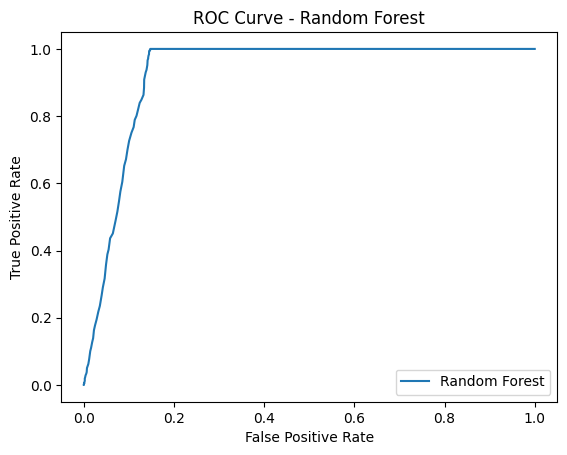

In [30]:
# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_rf_test, rf_pred_prob)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [32]:
test_data_rf = pd.DataFrame([
    {'age': 45, 'income': 67000, 'assets': 350000, 'credit_score': 750, 'debt_to_income_ratio': 0.32, 'existing_loan': 0, 'criminal_record': 0},
    {'age': 62, 'income': 84000, 'assets': 600000, 'credit_score': 810, 'debt_to_income_ratio': 0.29, 'existing_loan': 1, 'criminal_record': 0},
    {'age': 53, 'income': 39700, 'assets': 420000, 'credit_score': 665, 'debt_to_income_ratio': 0.41, 'existing_loan': 0, 'criminal_record': 1},
    {'age': 38, 'income': 54000, 'assets': 500000, 'credit_score': 480, 'debt_to_income_ratio': 0.76, 'existing_loan': 1, 'criminal_record': 0},
    {'age': 60, 'income': 135000, 'assets': 850000, 'credit_score': 860, 'debt_to_income_ratio': 0.22, 'existing_loan': 0, 'criminal_record': 0}
])

rf_sample_pred = rf_classifier.predict(test_data_rf)
print(rf_sample_pred)

[0 0 0 0 0]
